Fitting Magnetic Rossby Waves to Secular Acceleration

The application of complex empirical orthogonal functions to secular acceleration (SA) revealed high-latitude waves below Alaska. The principal (first) mode had an angular order of m=3 and a period of T = 20.75 $\pm$ 3.4 years. Different combinations of input parameters can reproduce this period. The choice of parameters include the layer thickness (H), the stratification (Np = N/Omega) and the strength of the magnetic field (Br). The example below shows one choice for H, Np and Br. 

In [10]:
using LinearAlgebra
using NonlinearEigenproblems
using Interpolations
using Plots
include("ProjectFiles.jl");


In [11]:
# define model parameters
H = 140.0;    # thickness of layer (km)
Np = 0.58;    # dimensionless stratification Np = N/Omega
m = 3;        # angular order
Br = 0.62;     # radial magnetic field (mT)

In [12]:
# number of grid points in latitude (equator to pole)
ngrid = 160;

A total of 320 modes are recovered when ngrid=160. Select an initial estimate of the period to identify the wave of interest.  

In [13]:
# initial period
T = -22.0;     # years

In [14]:
pd,q,bx,by,y = pWaves(ngrid,H,Np,Br,m,T);
println("Period = ",pd," (years)    Quality factor Q = ",q);

mode number = 14
Period = -20.686973508277575 (years)    Quality factor Q = 61.61627708206998


Convert the meridional grid to latitude (in degree) and plot the real part of the eigenfunction $b_y$

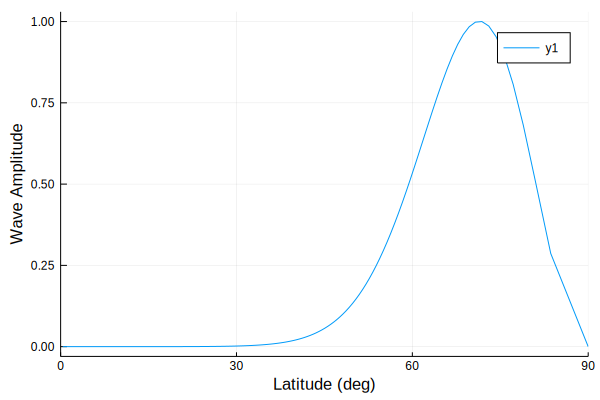

In [15]:
lat = asin.(y)*180.0/pi;
amp = maximum(abs.(real(by)));
plot(lat,abs.(real(by)/amp),xlabel="Latitude (deg)",ylabel="Wave Amplitude",xlim=(0,90))

Compute horizontal components velocity $(v_{\theta},v_{\phi})$ and acceleration $(a_{\theta}, a_{\phi})$ from the eigenfunctions by and bx

In [16]:
ntheta = 80
t,clt,lg,vph,vth,aph,ath = realization(ntheta,H,Br,m,y,bx,by,pd,q);

Compute the horizontal divergence of velocity and acceleration

Velocity Field

$\nabla \cdot {\bf v}_H = \frac{1}{r \sin\theta}\, \partial_{\theta} (\sin\theta v_{\theta})  + \frac{1}{r\sin\theta} \partial_\phi v_{\phi}$

Acceleration

$\nabla \cdot {\bf a}_H = \frac{1}{r \sin\theta}\, \partial_{\theta} (\sin\theta a_{\theta})  + \frac{1}{r\sin\theta} \partial_\phi a_{\phi}$

In [17]:
vdiv, adiv = divergence(t,clt,lg,vph,vth,aph,ath);

Check amplitude of adiv

In [18]:
println("adiv = ",maximum(adiv), "  advection = ", m * maximum(ath)/3480.0)


adiv = 4.608747946610487e-5  advection = 0.0002618749183580461


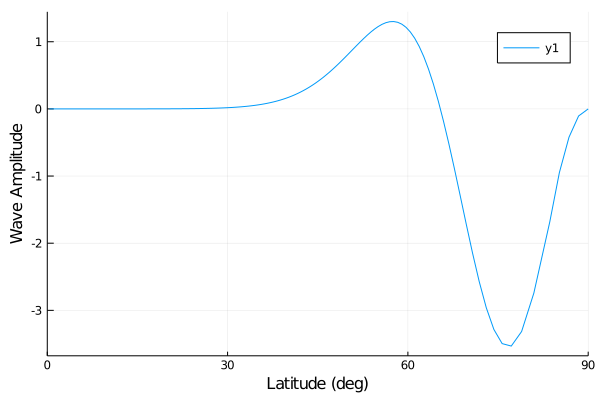